## Task

● Write a (Python) program that  
○ reads in a network from an sif-file  
○ checks if all nodes are connected, and if not finds the giant component (=largest set of nodes
that are connected to each other)  
○ calculates the closeness centrality for each node in the giant component  
■ If you want more of a challenge, you can calculate the betweenness centrality instead

● You can check your results with cytoscape or NetworkX (https://networkx.org/)

● You can not use any of the functionalities of NetworkX, you have to write the
code on your own  
○ You can use “standard” Python libraries, but nothing related to networks. If in doubt, ask me.

● There are no points for style or efficiency etc, but your code needs to be able  
to calculate the chosen centrality for galFiltered.sif (see below) in a
reasonable time

#### Additional information
● Simple interaction format  
○ Different flavours, the examples I provide are written as  
Node1 pp Node2  
Node1 pp Node3  
Node2 pp Node4  
● pp stands for protein-protein, it doesn’t matter for this exercise  
● Each line in the sif file corresponds to an edge in the network, conversely  
there is one line for each edge

In [3]:
import os
import matplotlib as plt
import numpy as np
import networkx as nx
from random import choice

In [4]:
cwd = os.getcwd()

def read_file(filename, cwd = cwd):
    #returns edge list stored in file
    with open(cwd + "/02_testfiles/" + filename) as file:
        contents = []

        for line in file:
            line = line.strip().split(sep=" pp ")
            contents.append((line[0], line[1]))


    return contents



In [5]:
# def convert_node_names_to_nums(edge_list_names, node_list):
#     #make dictionary with key = node name, value = node number representation
#     edge_nums = []

#     for edge in edge_list_names:
#         source = node_list.index(edge[0])
#         destination = node_list.index(edge[1])
#         edge_nums.append((source, destination))
        
#     return edge_nums
        


In [6]:
def make_label_dict(node_list):
    label_dict = {}
    node_num = 0

    for node in node_list:
        label_dict[node] = node_num
        node_num += 1

    return label_dict

def convert_node_names_to_nums(edge_list_names, node_list):
    #make dictionary with key = node name, value = node number representation
    label_dict = make_label_dict(node_list)

    edge_nums = []

    for edge in edge_list_names:
        source = label_dict[edge[0]]
        destination = label_dict[edge[1]]
        edge_nums.append((source, destination))

    # for edge in edge_list_names:
    #     source = node_list.index(edge[0])
    #     destination = node_list.index(edge[1])
    #     edge_nums.append((source, destination))
        
    return edge_nums
        


In [7]:
def get_Node_list(edge_list):
    #returns a Node list from an edge_list
    node_list = []
    for edge in edge_list:
        for node in edge:
            if node not in node_list:
                node_list.append(node)

    node_list.sort()

    return node_list

In [8]:
def make_adjacency_matrix(edges, nodes):
    #initialize zero adjacency matrix:
    adj_matrix = [[0 for _ in range(len(nodes))] for _ in range(len(nodes))]

    #set connections to 1:
    for edge in edges:
        source = edge[0]
        destination = edge[1]

        adj_matrix[source][destination] = 1

        adj_matrix[destination][source] = 1

    return adj_matrix
    print(adj_matrix)

In [9]:
tfile_01_edges_names = read_file("example.sif")
tfile_01_edges_names

[('A', 'B'),
 ('A', 'C'),
 ('B', 'D'),
 ('B', 'E'),
 ('C', 'F'),
 ('D', 'H'),
 ('E', 'F'),
 ('F', 'G'),
 ('G', 'H')]

In [10]:
tfile_01_nodes = get_Node_list(tfile_01_edges_names)
tfile_01_nodes

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

In [11]:
tfile_01_edges = convert_node_names_to_nums(tfile_01_edges_names, tfile_01_nodes)
tfile_01_edges

[(0, 1), (0, 2), (1, 3), (1, 4), (2, 5), (3, 7), (4, 5), (5, 6), (6, 7)]

In [12]:
tfile_01_adjmat = make_adjacency_matrix(tfile_01_edges, tfile_01_nodes)
tfile_01_adjmat

[[0, 1, 1, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 1, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 1],
 [0, 1, 0, 0, 0, 1, 0, 0],
 [0, 0, 1, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 0, 1],
 [0, 0, 0, 1, 0, 0, 1, 0]]

In [13]:
def get_closeness_centrality(N, M, i):
    #returns closeness centrality (CC) value of node i
    #Params: 
    # N = total number of nodes
    # M = adjacency matrix
    # i = Node i (= Node of interest)


    # dxi = distance between node x and node i, with i != x

    return CC

In [14]:
def get_betweenness_centrality(M, i):
    #returns Betweenness centrality (BC) value of node i
    #Params: 
    # M = adjacency matrix
    # i = Node i (= Node of interest)


    return BC

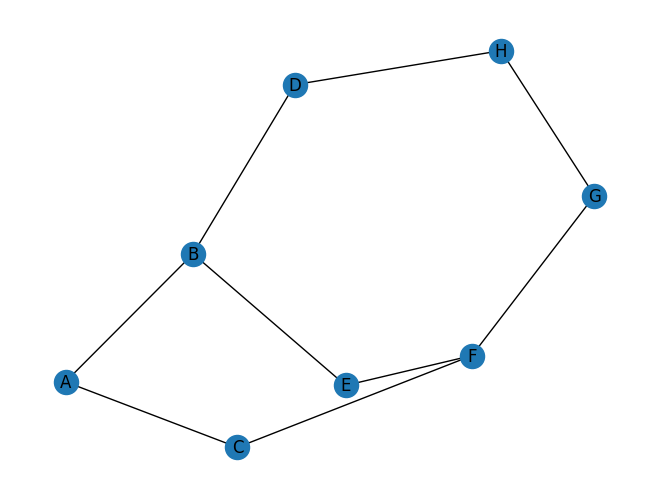

In [15]:
G = nx.from_edgelist(tfile_01_edges_names)
nx.draw(G, with_labels = True)


#np_matrix = np.asmatrix(tfile_01_adjmat)
#G3 = nx.from_numpy_array(np_matrix)
#nx.draw(G3)



In [ ]:
def check_connectivity(edge_list, node_list):
    #checks, if all nodes are connected.
    # Params:
    # M = adjacency matrix
    # node_list = sorted name list of nodes

    #select random starting node:
    N_i = choice(node_list)
    
    distance = 0
    distance_dict = {distance:[N_i]}

    #convert edge_list to list of lists
    edges = [list(elem) for elem in edge_list]


    t = True    
    c = 0
    #approach 01: make a dictionary with distance:node(s)
    # while t == True:
    #     print(distance_dict)
    #     print(distance)
    #     print()
    #     distance += 1
    #     distance_dict[distance] = []

    #     for node in distance_dict[distance-1]:
    #         print(node)
    #         for edge in edge_list:
    #             if node in edge:
    #                 print(edge)
    #                 for node in edge:
    #                     if node not in distance_dict[distance]:
    #                         print(node)
    #                         distance_dict[distance].append(node)

    #     if len(distance_dict[distance]) == 0 or c >= 10:
    #         print("break")
    #         break 
    #     c += 1
        
    #approach 2: make dictionary with node(label):distance 
    distance_dict = {}
    distance_dict[N_i] = 0


    while t == True and c <= 10:
        distance += 1

        # print(f"appr 02: {distance_dict}")
        #iterate over distance-1 nodes (start with 0, then distance=1, etc)
        #recent_nodes = [list(distance_dict.values()).index(0)]
        recent_nodes = list(distance_dict.keys())[list(distance_dict.values()).index(distance-1)]
        # print()
        # print("recent nodes:")
        # print(recent_nodes)
        # print("distance")
        # print(distance)
        # print()


        for node in recent_nodes:
          for edge in edge_list:
            if node in edge:
               #iterate over edges nodes to get other
               for inner_node in edge:
                  if inner_node != node and inner_node not in distance_dict:
                     distance_dict[inner_node] = distance


        if len(distance_dict) >= len(node_list):
            print("break because of len")
            break 
        # elif c >= 10:
        #     print("break because of c")
        #     break

        # c += 1

In [27]:
check_connectivity(tfile_01_edges_names, tfile_01_nodes)

appr 02: {'H': 0}

recent nodes:
H
distance
1

appr 02: {'H': 0, 'D': 1, 'G': 1}

recent nodes:
D
distance
2

appr 02: {'H': 0, 'D': 1, 'G': 1, 'B': 2}

recent nodes:
B
distance
3

appr 02: {'H': 0, 'D': 1, 'G': 1, 'B': 2, 'A': 3, 'E': 3}

recent nodes:
A
distance
4

appr 02: {'H': 0, 'D': 1, 'G': 1, 'B': 2, 'A': 3, 'E': 3, 'C': 4}

recent nodes:
C
distance
5

break because of len
